# Question 3

Write Python code to build a neural network with the following details. 

    - Input data = Iris dataset
    - Number of hidden layers = 1
    - Number of units in hidden layer = 5,10,15,20,25
    - Number of iterations = 5000
    - Learning rate = 0.0001
    - Learning algorithm = stochastic gradient descent
    - Activation = logistic 

1. Compare the training score for various hidden units. 
2. Plot the loss curve for various hidden units. 
3. Report execution time for various hidden units as a bar graph. (Use library time and time() method) 


## Expectations

1. Expected output: (approximately)
    - Training accuracy 5 is xx.xxx 
    - Training accuracy 10 is xx.xxx 
    - Training accuracy 15 is xx.xxx 
    - Training accuracy 20 is xx.xxx 
    - Training accuracy 25 is xx.xxx

2. Graph: Training Loss (Actual output may vary)
![title](images/op-hidden.png)

3. Bar graph: Execution Time (Actual output may vary)
![title](images/time-hidden.png)

You are expected to modify this notebook and upload the modified file as assignment submission.

<b> PS: Code written within the block will be evaluted. Other code will be ignored.
#### start code here
#### end code here

In [2]:
from sklearn import datasets  
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset.

iris = datasets.load_iris()

# Extract all columns except last from the dataset for X values.
# y is the target column.

X = iris["data"][:,:-1]  
y = iris["target"]

# Split data into train and test

(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size= 0.3)

# normalise the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
# Use the library function sklearn.neural_network.MLPClassifier 

# Build neural network for various hidden units. (max 10 lines of code) Use loop.  
# start code here
from sklearn.neural_network import MLPClassifier
import time
num_hidden_units = [5,10,15,20,25]
models, predicts, run_times = {}, {}, []
for hunits in num_hidden_units:
    strt_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes=(hunits),
                        activation='logistic',
                        solver='sgd',
                        learning_rate='constant',
                        learning_rate_init=0.0001,
                        shuffle=True,
                        max_iter=5000,
                        random_state=1,
                        tol=0.00001)
    models[hunits] = mlp.fit(X_train,y_train)
    predicts[hunits] = models[hunits].predict(X=X_test)
    run_times.append(time.time() - strt_time)
# end code here

/usr/local/python3-tgt-201901/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/python3-tgt-201901/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/python3-tgt-201901/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/python3-tgt-201901/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and th

In [167]:
# Compare the training  score for various hidden units. (max 2 lines of code) Use loop.

# start code here
from sklearn.metrics import accuracy_score
for h_units, y_pred in predicts.items(): print("Training accuracy",h_units, "is", str(round(accuracy_score(y_test, y_pred)*100, 3)))
# end code here

Training accuracy 5 is 77.778
Training accuracy 10 is 82.222
Training accuracy 15 is 82.222
Training accuracy 20 is 82.222
Training accuracy 25 is 84.444


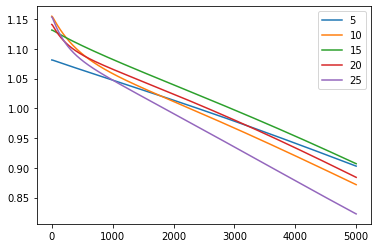

In [160]:
# Plot the loss curve for various hidden units. (max 5 lines of code) Use loop.

# start code here
for hunits, mdl in models.items(): plt.plot(mdl.loss_curve_, label=str(hunits))
plt.legend()
plt.show()
# end code here

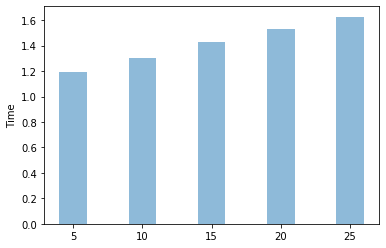

In [161]:
# Plot the execution time as bar graph. (max 5 lines of code)

# start code here
plt.bar(num_hidden_units, run_times, align='center', alpha=0.5, width=2.0)
plt.ylabel('Time')
plt.show()
# end code here